# Library Data Contest 2019
**Authors:** Haleh Ale-Ahmand, Moein Hosseini<br/>
March 2019

**QUESTIONS:**<br/>
1. Are citations subset of traffic stops? <br/>
'When a traffic stop is made, a warning issued by the officer is a statement that the motorist has committed some offense, but is being spared the actual citation.'

## 0. PACKAGES AND FUNCTIONS

In [124]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pytz
from datetime import datetime
import seaborn as sns

In [101]:
def replace_time(row):
    return row['Date_Object'].replace(hour = row['Hour'], minute = row['Minute'])

# 1. READ DATA

## 1.1 Evanston Citations<br/>
'Citations issued by officers during their tour of duty, excluding parking citations.'

In [62]:
citations_df = pd.read_csv('./Data/Evanston_Citations.csv')
citations_df.head(5)

,Citation Number,Citation Date,Citation Time,Day of the Week,Age,Race,Sex,Police Beat
0,YW341477,04/04/2031 12:00:00 AM,803.0,Fri,42.0,White,Female,NaN
1,YW436498,08/08/2020 12:00:00 AM,1839.0,Sat,38.0,Asian,Female,NaN
2,SE588873,03/22/2019 12:00:00 AM,908.0,Fri,55.0,White,Female,NaN
3,SE588869,03/22/2019 12:00:00 AM,831.0,Fri,67.0,White,Female,NaN
4,SE588925,03/22/2019 12:00:00 AM,1804.0,Fri,38.0,Black,Male,NaN


## 1.2 Evanston Traffic Stops

In [90]:
stops_df = pd.read_csv('./Data/Traffic_Stops_in_Evanston.csv')
stops_df.head(5)

,rpmainid,Stop Date,Stop Time,Day of the Week,Age,Race,Sex,Street Number,Street Name,Police Beat
0,45963,03/23/2019 12:00:00 AM,20,Sat,22.0,White,Female,800,LINCOLN ST,76.0
1,45953,03/22/2019 12:00:00 AM,1800,Fri,67.0,White,Female,500,CHICAGO AV/SOUTH BL,72.0
2,45954,03/22/2019 12:00:00 AM,1752,Fri,38.0,White,Male,800,RIDGE AV/WASHINGTON ST,71.0
3,45924,03/22/2019 12:00:00 AM,1048,Fri,19.0,Black,Male,900,MULFORD ST/RIDGE AV,78.0
4,45915,03/22/2019 12:00:00 AM,1036,Fri,67.0,Black,Male,100,BARTON AV/HOWARD ST,78.0


## 1.3 Evanston Crashes

In [83]:
crashes_df = pd.read_csv('./Data/Evanston_Traffic_Crashes.csv')
crashes_df.head(5)

,Accident ID (FK),Day of the Week,Accident Date,Accident Time,Accident Street Name,Direction from Intersecting Road,GEO-X,GEO-Y,Police Beat
0,19002236,Thu,03/21/2019,740,RIDGE,NaN,0,0,NaN
1,19002255,Thu,03/21/2019,1630,DEMPSTER,NaN,0,0,NaN
2,19002238,Thu,03/21/2019,940,FOWLER AV,NaN,0,0,NaN
3,19002251,Thu,03/21/2019,1544,JUDSON AVE,NaN,0,0,NaN
4,19002237,Thu,03/21/2019,749,CRAIN,NaN,0,0,NaN


# 2. Data Preprocessing

## 1.1 Evanston Citations

In [80]:
citations_df.isna().sum()

Citation Number       0
Citation Date         0
Citation Time         0
Day of the Week       0
Age                  48
Race               1511
Sex                  49
DateTime_Object       0
Minute                0
Hour                  0
Date_Object           0
dtype: int64

In [64]:
# Drop 'Police Beat'
citations_df.drop(['Police Beat'], axis = 1, inplace= True)
# Number of rows
print(len(citations_df.index))

24815


In [65]:
# Remove NAs
citations_df.dropna(subset = ['Citation Number', 'Citation Time', 'Day of the Week'], inplace= True)
# Number of rows
print(len(citations_df.index))

24814


In [66]:
# number of negative ages
print(citations_df['Age'][citations_df['Age'] < 0].size)
# Remove Negative Age
citations_df = citations_df.loc[np.logical_not(citations_df['Age'] < 0), :]
# Number of rows
print(len(citations_df.index))

1
24813


## 1.2 Evanston Traffic Stops

In [84]:
stops_df.isna().sum()

rpmainid              0
Stop Date             0
Stop Time             0
Day of the Week       0
Age                 203
Race                227
Sex                   0
Street Number      2763
Street Name           0
Police Beat        9410
dtype: int64

In [85]:
# Drop 'Police Beat'
stops_df.drop(['Police Beat'], axis = 1, inplace= True)
# Number of rows
print(len(stops_df.index))

35965


In [86]:
# number of negative ages
print(stops_df['Age'][stops_df['Age'] < 0].size)
# Remove Negative Age
stops_df = stops_df.loc[np.logical_not(stops_df['Age'] < 0), :]
# Number of rows
print(len(stops_df.index))

0
35965


# 2. Datetime
## 2.1 Evanston Citations
What are the types of the columns?

In [10]:
citations_df.dtypes

Citation Number     object
Citation Date       object
Citation Time      float64
Day of the Week     object
Age                float64
Race                object
Sex                 object
dtype: object

In [78]:
# Date
citations_df['Date_Object'] = pd.to_datetime(citations_df['Citation Date'], format = '%m/%d/%Y %H:%M:%S %p')

Time in `Citation Date` is not correct. We need to modify it using `Citation Time`. First, change citation time to integer and then to string:

In [68]:
citations_df['Citation Time'] = citations_df['Citation Time'].astype(int).astype(str)
# MINUTE
citations_df['Minute']= citations_df['Citation Time'].apply(lambda x: int(x[-2:]))
# HOUR
citations_df['Hour']  = citations_df['Citation Time'].apply(lambda x: x[:-2])
print(citations_df['Hour'].unique())
# hour 0 would be blank.
citations_df.loc[citations_df['Hour'] == '', ['Hour']] = '0'
citations_df['Hour'] = citations_df['Hour'].astype(int)

['8' '18' '9' '7' '16' '12' '11' '6' '21' '14' '10' '15' '17' '13' '5' '3'
 '4' '22' '' '19' '1' '23' '20' '2' '31' '32' '71']


Find the index of unacceptable *Hours*:

In [69]:
citations_df.loc[citations_df['Hour'] > 24,:]

,Citation Number,Citation Date,Citation Time,Day of the Week,Age,Race,Sex,DateTime_Object,Minute,Hour
3766,SE586258,11/11/2018 12:00:00 AM,3130,Sun,30.0,Black,Female,2018-11-11 12:00:00,30,31
5303,SE585335,09/27/2018 12:00:00 AM,3218,Thu,63.0,Black,Male,2018-09-27 12:00:00,18,32
8794,E200875,05/17/2018 12:00:00 AM,7159,Thu,49.0,White,Female,2018-05-17 12:00:00,59,71


Find the index of unacceptable *Minute*:

In [70]:
citations_df.loc[citations_df['Minute'] > 59,:]

,Citation Number,Citation Date,Citation Time,Day of the Week,Age,Race,Sex,DateTime_Object,Minute,Hour
488,SE588507,03/13/2019 12:00:00 AM,1690,Wed,79.0,Black,Female,2019-03-13 12:00:00,90,16
1107,SE588021,02/21/2019 12:00:00 AM,163,Thu,38.0,Asian,Female,2019-02-21 12:00:00,63,1
3359,SE586523,11/21/2018 12:00:00 AM,85,Wed,62.0,White,Male,2018-11-21 12:00:00,85,0


Remove the rows with unacceptale *Hour* and *Minute* and update *DateTime* object:

In [77]:
citations_df = citations_df[(0 <= citations_df['Minute']) & (citations_df['Minute']<= 59) &
                            (0 <= citations_df['Hour'])   & (citations_df['Hour']  <= 24)]
citations_df['DateTime_Object'] = citations_df.apply(replace_time, axis = 1)
citations_df.head(5)

,Citation Number,Citation Date,Citation Time,Day of the Week,Age,Race,Sex,DateTime_Object,Minute,Hour
0,YW341477,04/04/2031 12:00:00 AM,803,Fri,42.0,White,Female,2031-04-04 08:03:00,3,8
1,YW436498,08/08/2020 12:00:00 AM,1839,Sat,38.0,Asian,Female,2020-08-08 18:39:00,39,18
2,SE588873,03/22/2019 12:00:00 AM,908,Fri,55.0,White,Female,2019-03-22 09:08:00,8,9
3,SE588869,03/22/2019 12:00:00 AM,831,Fri,67.0,White,Female,2019-03-22 08:31:00,31,8
4,SE588925,03/22/2019 12:00:00 AM,1804,Fri,38.0,Black,Male,2019-03-22 18:04:00,4,18


## 2.2 Evanston Traffic Stops

In [93]:
stops_df.head(5)

,rpmainid,Stop Date,Stop Time,Day of the Week,Age,Race,Sex,Street Number,Street Name,Police Beat
0,45963,03/23/2019 12:00:00 AM,20,Sat,22.0,White,Female,800,LINCOLN ST,76.0
1,45953,03/22/2019 12:00:00 AM,1800,Fri,67.0,White,Female,500,CHICAGO AV/SOUTH BL,72.0
2,45954,03/22/2019 12:00:00 AM,1752,Fri,38.0,White,Male,800,RIDGE AV/WASHINGTON ST,71.0
3,45924,03/22/2019 12:00:00 AM,1048,Fri,19.0,Black,Male,900,MULFORD ST/RIDGE AV,78.0
4,45915,03/22/2019 12:00:00 AM,1036,Fri,67.0,Black,Male,100,BARTON AV/HOWARD ST,78.0


In [99]:
# Date
stops_df['Date_Object'] = pd.to_datetime(stops_df['Stop Date'], format = '%m/%d/%Y %H:%M:%S %p')

#Time
stops_df['Stop Time'] = stops_df['Stop Time'].astype(int).astype(str)

# MINUTE
stops_df['Minute']= stops_df['Stop Time'].apply(lambda x: int(x[-2:]))

# HOUR
stops_df['Hour']  = stops_df['Stop Time'].apply(lambda x: x[:-2])
print(stops_df['Hour'].unique())
# hour 0 would be blank.
stops_df.loc[stops_df['Hour'] == '', ['Hour']] = '0'
stops_df['Hour'] = stops_df['Hour'].astype(int)

['' '18' '17' '10' '8' '16' '12' '20' '11' '23' '9' '1' '21' '7' '15' '14'
 '6' '13' '19' '2' '22' '3' '4' '5']


In [106]:
stops_df = stops_df[(0 <= stops_df['Minute']) & (stops_df['Minute'] <= 59) &
                    (0 <= stops_df['Hour'])   & (stops_df['Hour']   <= 24)]
stops_df['DateTime_Object'] = stops_df.apply(replace_time, axis = 1)
stops_df.head(5)

,rpmainid,Stop Date,Stop Time,Day of the Week,Age,Race,Sex,Street Number,Street Name,Police Beat,Date_Object,Minute,Hour,DateTime_Object
0,45963,03/23/2019 12:00:00 AM,20,Sat,22.0,White,Female,800,LINCOLN ST,76.0,2019-03-23 12:00:00,20,0,2019-03-23 00:20:00
1,45953,03/22/2019 12:00:00 AM,1800,Fri,67.0,White,Female,500,CHICAGO AV/SOUTH BL,72.0,2019-03-22 12:00:00,0,18,2019-03-22 18:00:00
2,45954,03/22/2019 12:00:00 AM,1752,Fri,38.0,White,Male,800,RIDGE AV/WASHINGTON ST,71.0,2019-03-22 12:00:00,52,17,2019-03-22 17:52:00
3,45924,03/22/2019 12:00:00 AM,1048,Fri,19.0,Black,Male,900,MULFORD ST/RIDGE AV,78.0,2019-03-22 12:00:00,48,10,2019-03-22 10:48:00
4,45915,03/22/2019 12:00:00 AM,1036,Fri,67.0,Black,Male,100,BARTON AV/HOWARD ST,78.0,2019-03-22 12:00:00,36,10,2019-03-22 10:36:00


In [158]:
print(stops_df['Hour'].min())
print(stops_df['Hour'].max())

0
23


## 2.3 Evanston Crashes

In [109]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 9 columns):
Accident ID (FK)                    5540 non-null int64
Day of the Week                     5540 non-null object
Accident Date                       5540 non-null object
Accident Time                       5540 non-null int64
Accident Street Name                5540 non-null object
Direction from Intersecting Road    754 non-null object
GEO-X                               5540 non-null int64
GEO-Y                               5540 non-null int64
Police Beat                         1562 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 389.6+ KB


In [121]:
# Date
crashes_df['Date_Object'] = pd.to_datetime(crashes_df['Accident Date'], format = '%m/%d/%Y')
crashes_df['DateTime_Object'] = crashes_df['Date_Object'].map(lambda x: datetime.combine(x, datetime.min.time()))
print(crashes_df['Date_Object'].dtype, crashes_df['Date_Object'].dtype)

#Time
crashes_df['Accident Time'] = crashes_df['Accident Time'].astype(int).astype(str)

# MINUTE
crashes_df['Minute']= crashes_df['Accident Time'].apply(lambda x: int(x[-2:]))

# HOUR
crashes_df['Hour']  = crashes_df['Accident Time'].apply(lambda x: x[:-2])
print(crashes_df['Hour'].unique())
# hour 0 would be blank.
crashes_df.loc[crashes_df['Hour'] == '', ['Hour']] = '0'
crashes_df['Hour'] = crashes_df['Hour'].astype(int)

datetime64[ns] datetime64[ns]
['7' '16' '9' '15' '13' '8' '3' '18' '10' '23' '21' '20' '17' '19' '2'
 '11' '14' '12' '22' '' '1' '5' '6' '4']


In [122]:
crashes_df = crashes_df[(0 <= crashes_df['Minute']) & (crashes_df['Minute']<= 59) &
                        (0 <= crashes_df['Hour'])   & (crashes_df['Hour']  <= 24)]
crashes_df['DateTime_Object'] = crashes_df.apply(replace_time, axis = 1)
crashes_df.head(5)

,Accident ID (FK),Day of the Week,Accident Date,Accident Time,Accident Street Name,Direction from Intersecting Road,GEO-X,GEO-Y,Police Beat,Date_Object,DateTime_Object,Minute,Hour
0,19002236,Thu,03/21/2019,740,RIDGE,NaN,0,0,NaN,2019-03-21,2019-03-21 07:40:00,40,7
1,19002255,Thu,03/21/2019,1630,DEMPSTER,NaN,0,0,NaN,2019-03-21,2019-03-21 16:30:00,30,16
2,19002238,Thu,03/21/2019,940,FOWLER AV,NaN,0,0,NaN,2019-03-21,2019-03-21 09:40:00,40,9
3,19002251,Thu,03/21/2019,1544,JUDSON AVE,NaN,0,0,NaN,2019-03-21,2019-03-21 15:44:00,44,15
4,19002237,Thu,03/21/2019,749,CRAIN,NaN,0,0,NaN,2019-03-21,2019-03-21 07:49:00,49,7


# 3. Visulalization

## 3.1 DateTime

### 3.1.1 Based on Gender

In [261]:
sns.set_palette(sns.hls_palette(l=.5, s=.9))

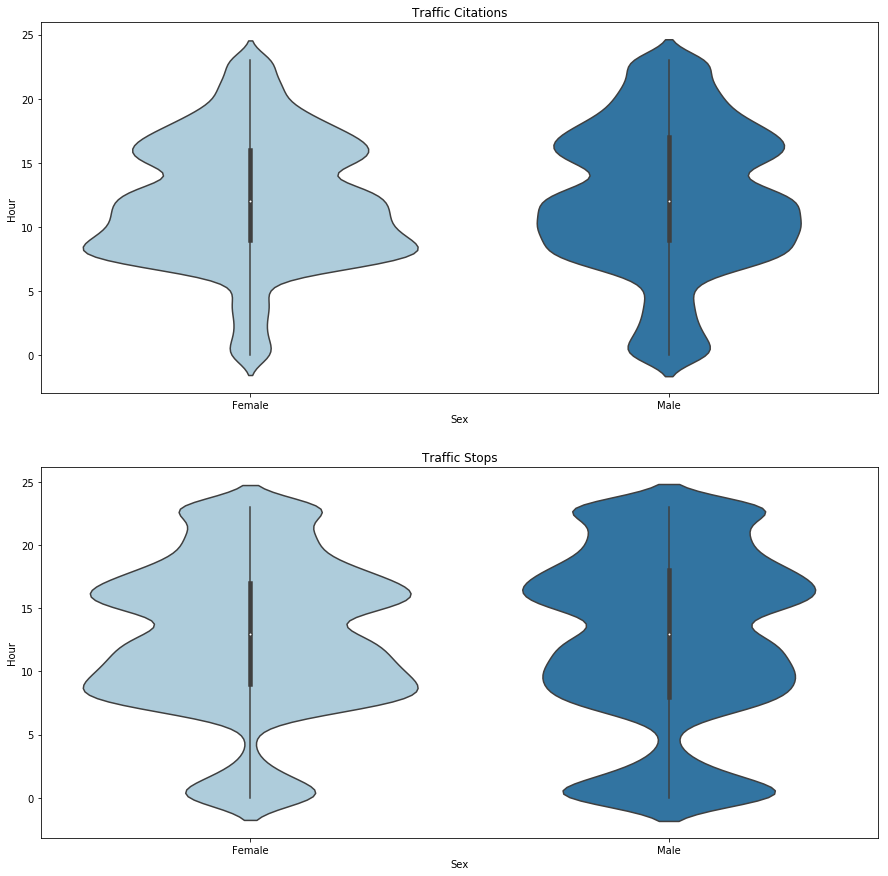

In [216]:
fig, axes = plt.subplots(figsize = (15, 15), nrows = 2, ncols = 1)
sns.violinplot(x= 'Sex', y= 'Hour', data = citations_df, ax = axes[0], palette = 'Paired')
sns.violinplot(x= 'Sex', y= 'Hour', data = stops_df    , ax = axes[1], palette = 'Paired')

axes[0].set_title('Traffic Citations')
axes[1].set_title('Traffic Stops')

plt.show()

### 3.1.2 Based on day of week

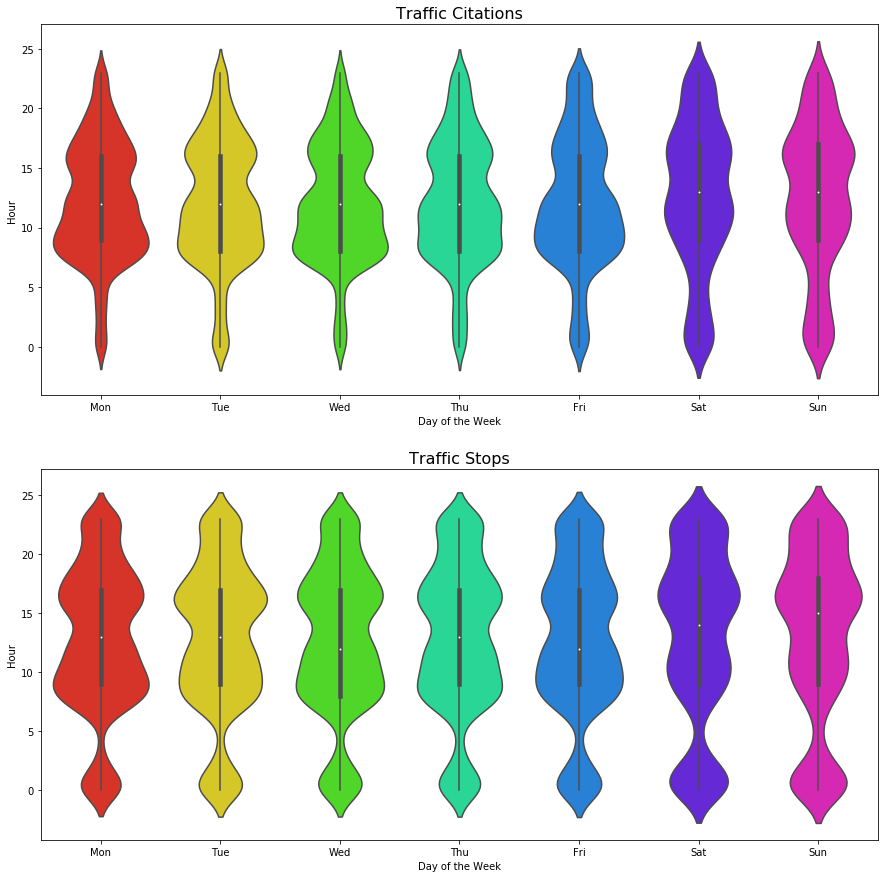

In [204]:


fig, axes = plt.subplots(figsize = (15, 15), nrows = 2, ncols = 1)
sns.violinplot(x= 'Day of the Week', y= 'Hour', data = citations_df, ax = axes[0],
               order=["Mon", "Tue", "Wed", 'Thu', 'Fri', 'Sat', 'Sun'])
sns.violinplot(x= 'Day of the Week', y= 'Hour', data = stops_df , ax = axes[1],
              order=["Mon", "Tue", "Wed", 'Thu', 'Fri', 'Sat', 'Sun'])


axes[0].set_title('Traffic Citations', fontsize = 16)
axes[1].set_title('Traffic Stops', fontsize = 16)

plt.show()

### 3.3 Based on Gender

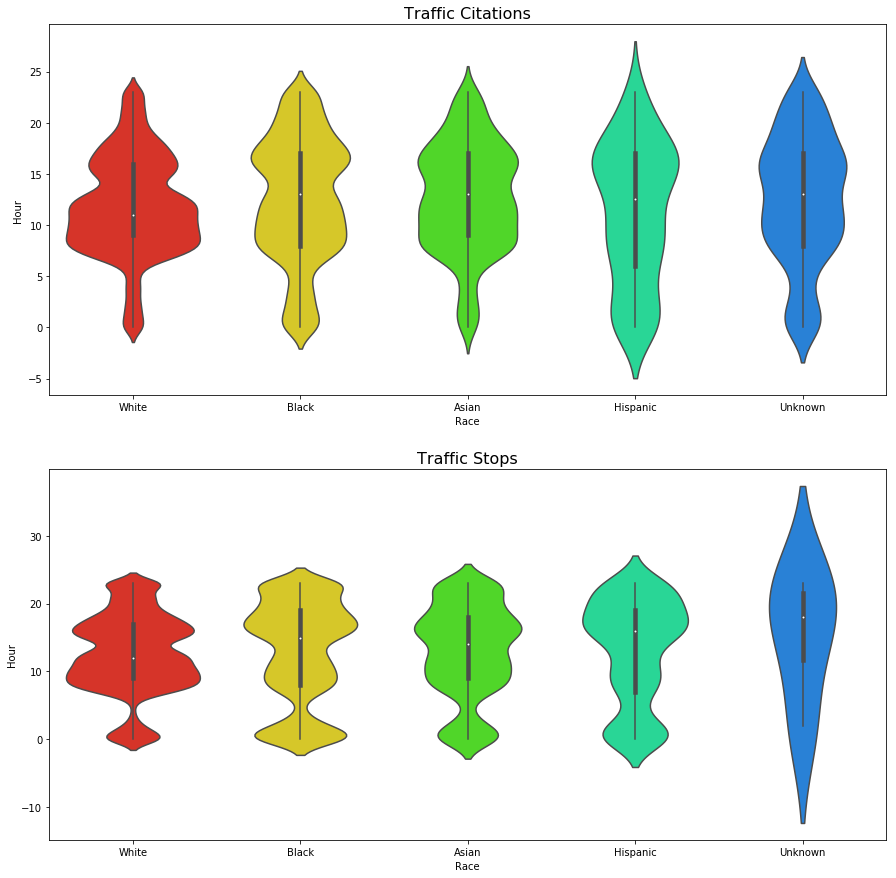

In [192]:
fig, axes = plt.subplots(figsize = (15, 15), nrows = 2, ncols = 1)
sns.violinplot(x= 'Race', y= 'Hour', data = citations_df, ax = axes[0],
              order = ['White', 'Black', 'Asian', 'Hispanic', 'Unknown'])
sns.violinplot(x= 'Race', y= 'Hour', data = stops_df , ax = axes[1],
              order = ['White', 'Black', 'Asian', 'Hispanic', 'Unknown'])

axes[0].set_title('Traffic Citations', fontsize = 16)
axes[1].set_title('Traffic Stops', fontsize = 16)

plt.show()

## 3.2 Gender

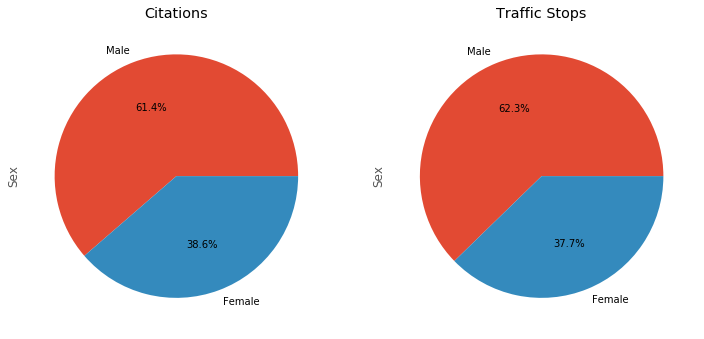

In [164]:
with plt.style.context('ggplot'):
    fig = plt.figure( figsize = (12,16))
    ax1 = fig.add_subplot(1, 2, 1)
    citations_df['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax1, title = 'Citations')
    
    ax2 = fig.add_subplot(1,2, 2)
    stops_df['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax2, title = 'Traffic Stops')
    

**GENDER AND RACE**

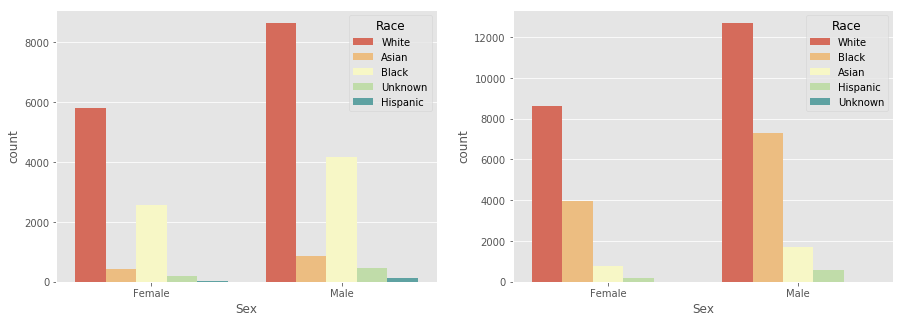

In [267]:
with plt.style.context('ggplot'):
    
    fig, axes = plt.subplots(figsize = (15,5), nrows = 1, ncols = 2)
    
    sns.countplot(x="Sex", hue= "Race" , data = citations_df, ax = axes[0], palette = 'Spectral')
    sns.countplot(x="Sex", hue= "Race" , data = stops_df, ax = axes[1], palette = 'Spectral')

# 3.3. Race

In [208]:
print(citations_df['Race'].unique())
print(stops_df['Race'].unique())

['White' 'Asian' 'Black' nan 'Unknown' 'Hispanic']
['White' 'Black' 'Asian' nan 'Hispanic' 'Unknown']


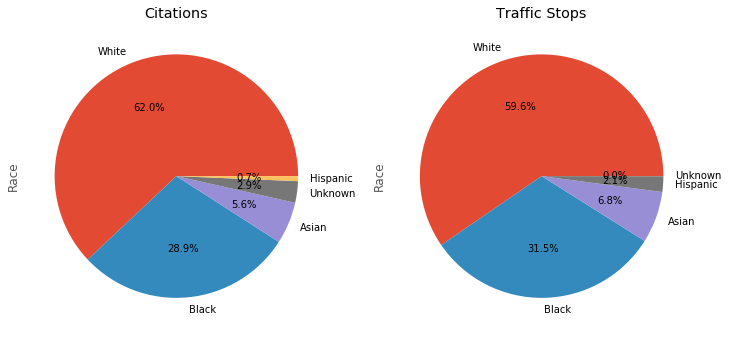

In [254]:
with plt.style.context('ggplot'):
    fig = plt.figure( figsize = (12,16))
    ax1 = fig.add_subplot(1, 2, 1)
    citations_df['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax1, title = 'Citations')
    
    ax2 = fig.add_subplot(1,2, 2)
    stops_df['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax2, title = 'Traffic Stops')
    

**RACE AND GENDER**

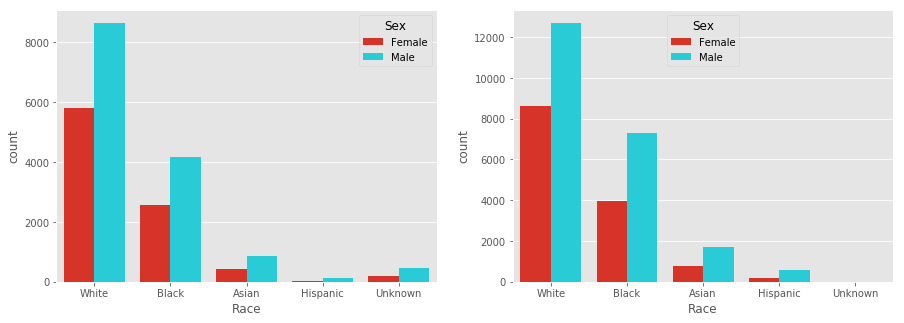

In [264]:
sns.set_palette(sns.hls_palette(2, l=.5, s=.9))
with plt.style.context('ggplot'):
    with sns.color_palette(sns.hls_palette(2, l=.5, s=.9)):
        fig, axes = plt.subplots(figsize = (15,5), nrows = 1, ncols = 2)

        sns.countplot(x="Race", hue= "Sex" , data = citations_df, ax = axes[0], 
                     order = ['White', 'Black', 'Asian', 'Hispanic', 'Unknown'])
        sns.countplot(x="Race", hue= "Sex" , data = stops_df, ax = axes[1],
                     order = ['White', 'Black', 'Asian', 'Hispanic', 'Unknown'])

# 3.4. Age

In [215]:
# Citations
citations_df['Age'].describe()

# Traffic Stops

count    24766.000000
mean        39.453121
std         15.415187
min         -4.000000
25%         27.000000
50%         37.000000
75%         51.000000
max         94.000000
Name: Age, dtype: float64

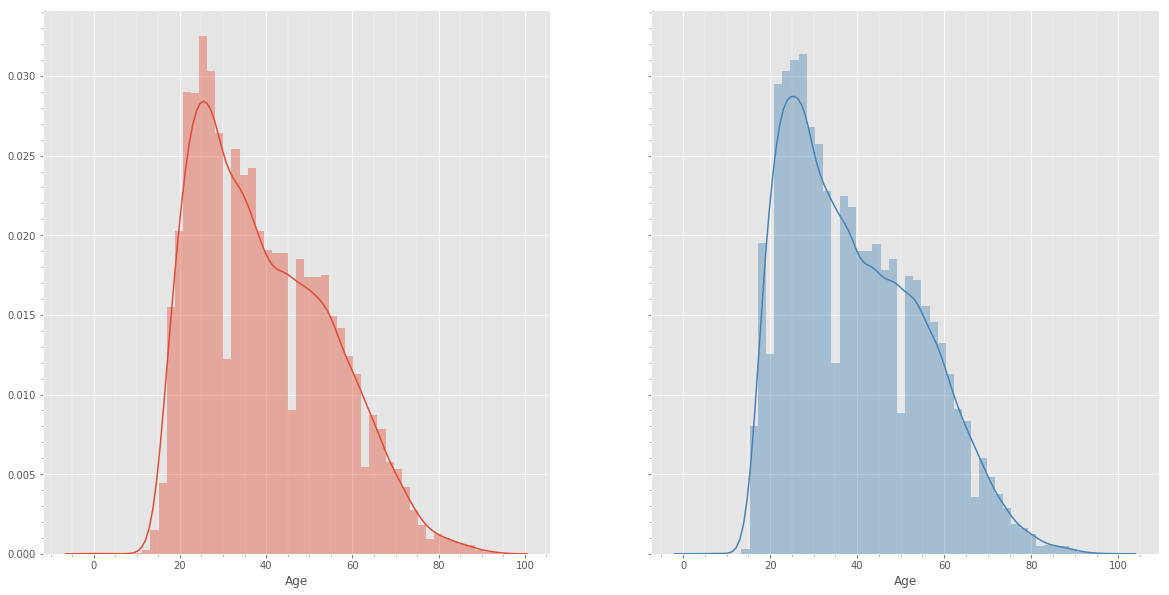

In [228]:
with plt.style.context('ggplot'):

    fig, axes = plt.subplots(figsize = (20,10), ncols = 2, nrows = 1, sharey = True)
    
    sns.distplot(citations_df['Age'].dropna(),  ax  = axes[0])
    axes[0].minorticks_on()
    axes[0].xaxis.grid(b=True, which='minor', color='w', linewidth = 0.4)
    
    sns.distplot(stops_df['Age'].dropna(),  ax  = axes[1], color = 'steelblue')
    axes[1].minorticks_on()
    axes[1].xaxis.grid(b=True, which='minor', color='w', linewidth = 0.4)

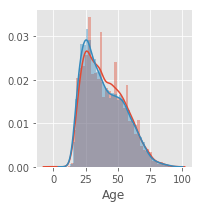

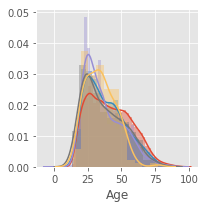

In [242]:
with plt.style.context('ggplot'):
    
    g = sns.FacetGrid(citations_df, hue="Sex")
    g.map(sns.distplot, "Age")
    
    g = sns.FacetGrid(citations_df, hue="Race")
    g.map(sns.distplot, "Age")

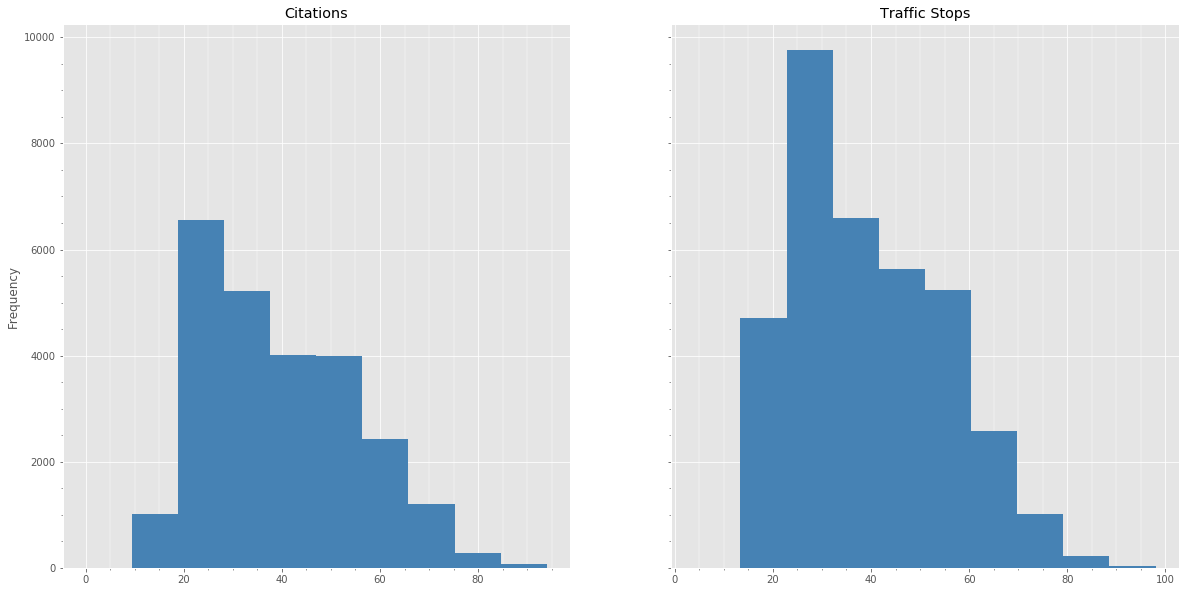

In [229]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize = (20,10), ncols = 2, nrows = 1, sharey = True)
    
    citations_df['Age'].plot(kind = 'hist', ax  = axes[0], title = 'Citations', color = 'steelblue')
    axes[0].minorticks_on()
    axes[0].xaxis.grid(b=True, which='minor', color='w', linewidth = 0.4)
    
    stops_df['Age'].plot(kind = 'hist', ax = axes[1], title = 'Traffic Stops', color = 'steelblue')
    axes[1].minorticks_on()
    axes[1].xaxis.grid(b=True, which='minor', color='w', linewidth = 0.4)
    

# 6. Special Days
## 6.1 Valentine's Day

In [ ]:
df_names = ['Citations', 'Traffic Stops']
dates = ['02/14/2017 12:00:00 AM', '02/14/2018 12:00:00 AM', '02/14/2019 12:00:00 AM']
years = ['2017', '2018', '2019']

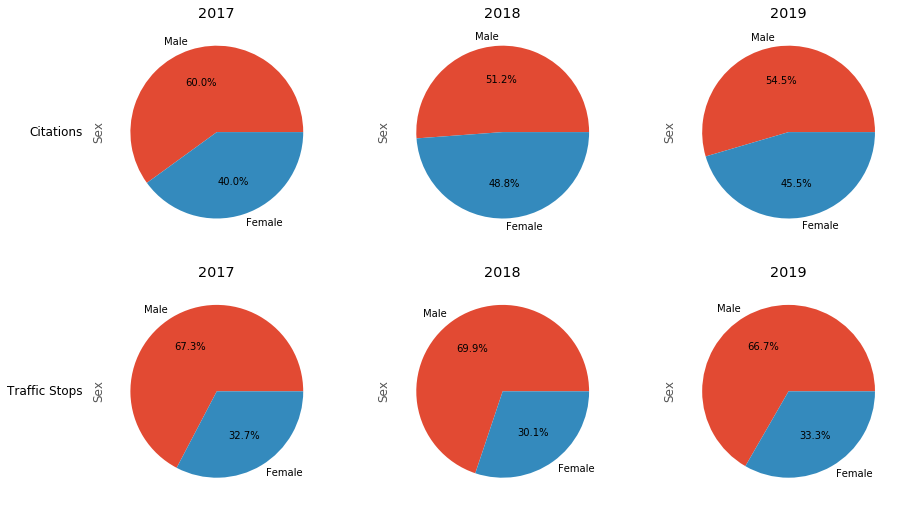

In [310]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,:]['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,:]['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

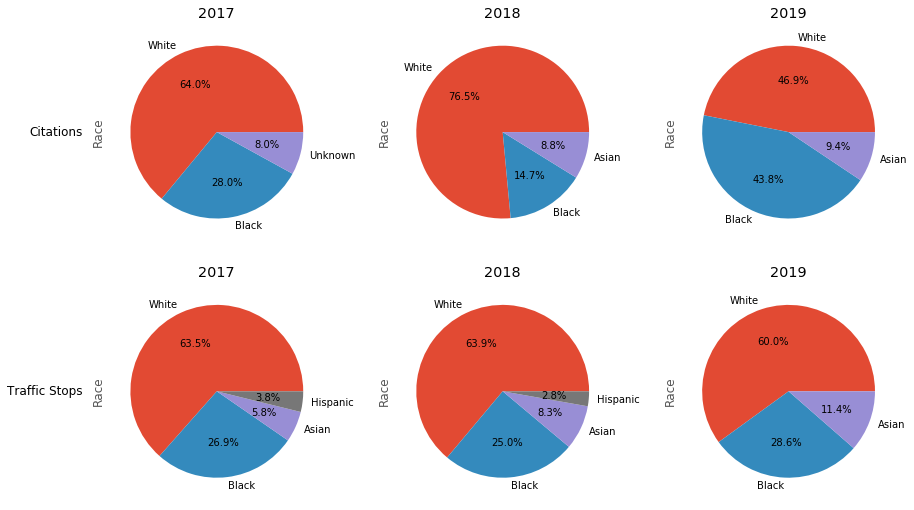

In [312]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,:]['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,:]['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

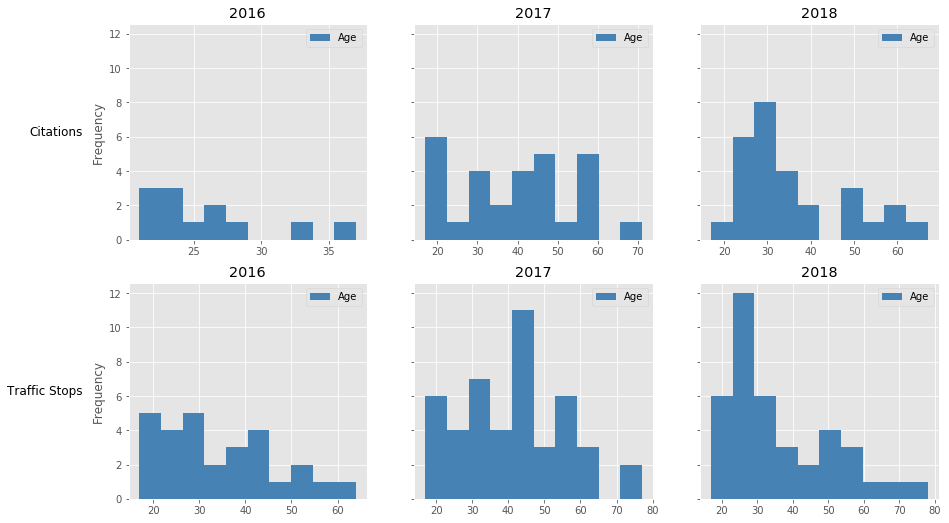

In [321]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3, sharey = True)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

## 6.2 Halloween 

In [318]:
df_names = ['Citations', 'Traffic Stops']
dates = ['10/31/2016 12:00:00 AM', '10/31/2017 12:00:00 AM', '10/31/2018 12:00:00 AM']
years = ['2016', '2017', '2018']

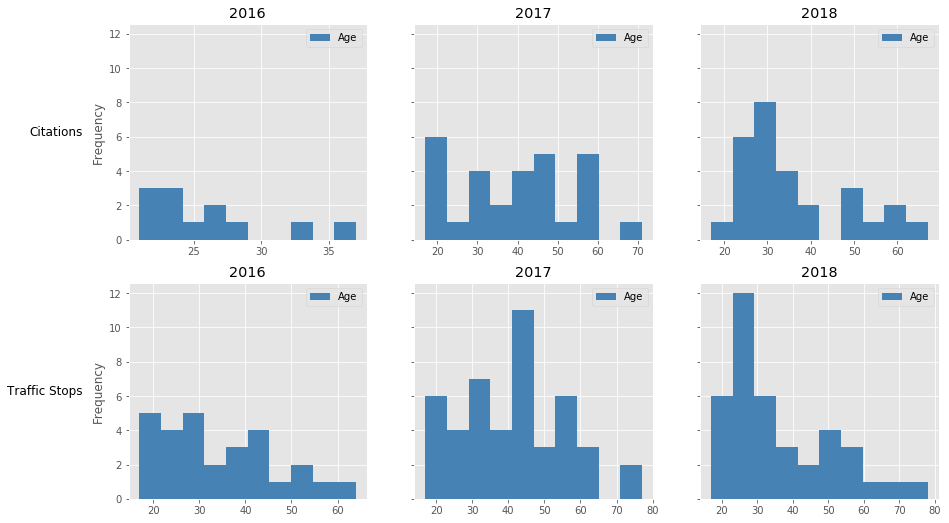

In [320]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3, sharey = True)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

1) Age over weekend vs. weekdays (Day of week) <br/>
2) Number of total citations over the years over Christmas <br/>
3) Number of total citations over the years over Halloween, Saint Patrick Day's, Thanksgiving, 4th of July, Labor Day <br/>
4) Gender over Mother's Day and Father's Day <br/>
5) Race over 'Cinco de Mayo' <br/>